In [22]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [23]:
FILE_PATH = os.path.join(os.getcwd() ,'all.Xlsx')
df = pd.read_excel(FILE_PATH)
df

,Number,Hgb,Gender,Age
0,1,9.3,F,82
1,2,10.2,F,77
2,3,10.7,F,52
3,4,11.7,F,73
4,5,11.6,F,74
...,...,...,...,...
213,214,13.4,M,21
214,215,13.7,F,55
215,216,12.7,M,29
216,217,11.1,F,53


In [24]:
#0 = f , 1 = m
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['Gender'])
df=df.drop(columns=['Gender'])
df

,Number,Hgb,Age,gender
0,1,9.3,82,0
1,2,10.2,77,0
2,3,10.7,52,0
3,4,11.7,73,0
4,5,11.6,74,0
...,...,...,...,...
213,214,13.4,21,1
214,215,13.7,55,0
215,216,12.7,29,1
216,217,11.1,53,0


In [25]:
df.isna().sum()

Number    0
Hgb       1
Age       0
gender    0
dtype: int64

In [26]:
df=df.dropna()

In [27]:
df.isna().sum()

Number    0
Hgb       0
Age       0
gender    0
dtype: int64

In [28]:
#remord number 93 since it doesn't contain hemoglobin level ,, we will not upload the photo to the model also
df[df['Number'] ==93]

,Number,Hgb,Age,gender


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 0 to 217
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Number  217 non-null    int64  
 1   Hgb     217 non-null    float64
 2   Age     217 non-null    int64  
 3   gender  217 non-null    int32  
dtypes: float64(1), int32(1), int64(2)
memory usage: 7.6 KB


In [30]:
df.describe()

,Number,Hgb,Age,gender
count,217.000000,217.000000,217.000000,217.000000
mean,109.576037,12.797097,42.433180,0.603687
std,63.211176,2.362605,16.757707,0.490262
min,1.000000,7.000000,19.000000,0.000000
25%,55.000000,11.000000,29.000000,0.000000
50%,110.000000,13.200000,40.000000,1.000000
75%,164.000000,14.900000,54.000000,1.000000
max,218.000000,17.400000,88.000000,1.000000


In [31]:
df['Hgb'].describe()

count    217.000000
mean      12.797097
std        2.362605
min        7.000000
25%       11.000000
50%       13.200000
75%       14.900000
max       17.400000
Name: Hgb, dtype: float64

In [32]:
scatter_fig = px.scatter(
    df, 
    x='Age', 
    y='Hgb', 
    color='gender',
    title='Scatter Plot: Age vs. Hemoglobin (Hgb)',
    labels={'Age': 'Age', 'Hgb': 'Hemoglobin (Hgb)'}
)
scatter_fig.show()


In [33]:
histogram_fig = px.histogram(
    df, 
    x='Hgb', 
    nbins=10, 
    title='Histogram: Distribution of Hemoglobin (Hgb)',
    labels={'Hgb': 'Hemoglobin (Hgb)'}
)
histogram_fig.show()

In [34]:
box_fig = px.box(
    df, 
    x='gender', 
    y='Hgb', 
    title='Box Plot: Hemoglobin (Hgb) by Gender',
    labels={'Hgb': 'Hemoglobin (Hgb)'}
)
box_fig.show()

In [35]:
df[df['Hgb'] >= 12].count() 

Number    141
Hgb       141
Age       141
gender    141
dtype: int64

In [36]:
df[df['Hgb'] < 12].count() 

Number    76
Hgb       76
Age       76
gender    76
dtype: int64

In [37]:
# base_folder = "D:/Me/grad/dataset anemia (1)/dataset anemia\Final_Data"  

# # Function to keep only "palpebral.png" files in each folder
# def filter_palpebral_images(base_folder):
#     for folder_name in os.listdir(base_folder):
#         folder_path = os.path.join(base_folder, folder_name)
        
#         # Skip non-directory files
#         if not os.path.isdir(folder_path):
#             continue
        
#         # Iterate through files in the folder
#         for file_name in os.listdir(folder_path):
#             if not file_name.endswith("palpebral.png"):
#                 # If file doesn't match the condition, remove it
#                 file_path = os.path.join(folder_path, file_name)
#                 try:
#                     os.remove(file_path)
#                     print(f"Removed: {file_path}")
#                 except Exception as e:
#                     print(f"Error removing file {file_path}: {e}")
#     print("Filtering completed.")

# # Run the function
# filter_palpebral_images(base_folder)


In [38]:
# # Function to filter and keep only "palpebral.png" files
# def filter_palpebral_images(base_folder):
#     for folder_name in os.listdir(base_folder):
#         folder_path = os.path.join(base_folder, folder_name)
        
#         # Skip non-directory files
#         if not os.path.isdir(folder_path):
#             continue
        
#         # Iterate through files in the folder
#         for file_name in os.listdir(folder_path):
#             if "forniceal_palpebral.png" in file_name or not file_name.endswith("palpebral.png"):
#                 # Remove files that are not the desired "palpebral.png"
#                 file_path = os.path.join(folder_path, file_name)
#                 try:
#                     os.remove(file_path)
#                     print(f"Removed: {file_path}")
#                 except Exception as e:
#                     print(f"Error removing file {file_path}: {e}")
#     print("Filtering completed.")

# # Run the function
# filter_palpebral_images(base_folder)


In [39]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to preprocess image in HSV color space
def preprocess_hsv(img_path, target_size=(224, 224)):
    try:
        # Load the image using OpenCV
        img = cv2.imread(img_path)

        # Check if image is loaded
        if img is None:
            raise ValueError(f"Image not found or cannot be opened: {img_path}")

        # Convert the image to HSV color space
        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        # Resize image
        img = cv2.resize(img, target_size)

        # Normalize the image (HSV channel values range: H=[0, 179], S=[0, 255], V=[0, 255])
        img = img.astype(np.float32)
        img[..., 0] = img[..., 0] / 179.0  # Normalize H channel to [0, 1]
        img[..., 1] = img[..., 1] / 255.0  # Normalize S channel to [0, 1]
        img[..., 2] = img[..., 2] / 255.0  # Normalize V channel to [0, 1]

        return img

    except Exception as e:
        print(f"Error processing image {img_path}: {e}")
        return None

# Function to load HSV-preprocessed images and link with metadata
def load_hsv_images_and_metadata(base_folder, metadata, target_size=(224, 224)):
    images = []
    metadata_values = []
    targets = []
    image_paths = []

    for _, row in metadata.iterrows():
        folder_name = row["Number"]

        # Ensure folder_name is a string and not NaN
        if pd.isna(folder_name):
            print("Warning: 'Number' column contains NaN. Skipping this row.")
            continue

        folder_name = str(folder_name).strip()
        folder_path = os.path.join(base_folder, folder_name)

        # Check if folder exists
        if os.path.exists(folder_path):
            found_image = False
            for file_name in os.listdir(folder_path):
                if file_name.endswith("palpebral.png"):  # Only process palpebral.png files
                    img_path = os.path.join(folder_path, file_name)

                    # Process image in HSV color space
                    preprocessed_image = preprocess_hsv(img_path, target_size)
                    if preprocessed_image is not None:
                        images.append(preprocessed_image)
                        image_paths.append(img_path)
                        metadata_values.append([row["Age"], row["gender"]])
                        targets.append(row["Hgb"])
                        found_image = True
                        break  # Process only the first valid image in the folder

            if not found_image:
                print(f"No valid image found in folder: {folder_path}")
        else:
            print(f"Folder does not exist: {folder_path}")

    return np.array(images), np.array(metadata_values), np.array(targets), image_paths

# Function to convert HSV to RGB for visualization



C:\Users\seif\AppData\Local\Temp\ipykernel_23680\3113569957.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



No valid image found in folder: D:/Me/grad/dataset anemia (1)/dataset anemia/Final_Data\95
No valid image found in folder: D:/Me/grad/dataset anemia (1)/dataset anemia/Final_Data\130
Number of images: 215
Number of metadata entries: 215
Number of targets: 215


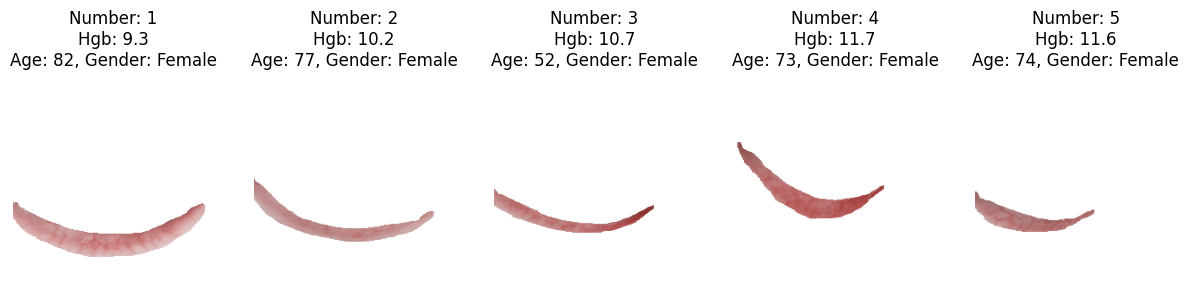

In [40]:
def hsv_to_rgb(hsv_image):
    # Convert HSV back to BGR using OpenCV
    bgr_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
    # Convert BGR to RGB
    rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
    return rgb_image

# Function to visualize images with metadata in HSV color space
def visualize_images_with_metadata(images, metadata, targets, numbers, num_to_display=5):
    plt.figure(figsize=(15, 5))
    for i in range(min(num_to_display, len(images))):
        plt.subplot(1, num_to_display, i + 1)
        
        # Convert HSV image to RGB for visualization
        rgb_image = hsv_to_rgb(images[i])
        
        plt.imshow(rgb_image)
        plt.axis("off")

        age = metadata[i][0]
        gender = 'Male' if metadata[i][1] == 1 else 'Female'
        hgb = targets[i]
        number = numbers[i]

        plt.title(f"Number: {number}\nHgb: {hgb}\nAge: {age}, Gender: {gender}")

    plt.show()

# Base folder path
base_folder = "D:/Me/grad/dataset anemia (1)/dataset anemia/Final_Data"

# Ensure 'Number' column is clean in the DataFrame
df["Number"] = df["Number"].astype(str).str.strip()

# Load the HSV-preprocessed data
images, metadata_values, targets, image_paths = load_hsv_images_and_metadata(base_folder, df)

# Output stats
print(f"Number of images: {len(images)}")
print(f"Number of metadata entries: {len(metadata_values)}")
print(f"Number of targets: {len(targets)}")

# Display some sample images with metadata
numbers = df['Number'].values  
visualize_images_with_metadata(images, metadata_values, targets, numbers, num_to_display=5)

In [41]:
# Define data augmentation for images
image_augmentor = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Function to augment both images and metadata
def augment_data(images, metadata_values, targets, num_augmentations=15):
    augmented_images, augmented_metadata, augmented_targets = [], [], []

    for i in range(len(images)):
        img = images[i]
        meta = metadata_values[i]
        target = targets[i]

        img = np.expand_dims(img, axis=0)  # Expand dimensions for augmentation
        aug_iter = image_augmentor.flow(img, batch_size=1)

        for _ in range(num_augmentations):
            aug_img = aug_iter.next()[0]
            augmented_images.append(aug_img)
            augmented_metadata.append(meta)
            augmented_targets.append(target)

    return np.array(augmented_images), np.array(augmented_metadata), np.array(augmented_targets)

aug_images, aug_metadata, aug_targets = augment_data(images, metadata_values, targets, num_augmentations=15)

print(f"Augmented images: {aug_images.shape[0]}")
print(f"Augmented metadata: {aug_metadata.shape[0]}")
print(f"Augmented targets: {aug_targets.shape[0]}")


Augmented images: 3225
Augmented metadata: 3225
Augmented targets: 3225


In [45]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models

def create_model_with_densenet(input_shape_image, input_shape_metadata):
    # Image input branch using DenseNet121
    base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=input_shape_image)
    base_model.trainable = False

    # Add a custom head on top of DenseNet121
    image_input = base_model.input
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)

    # Metadata input branch
    metadata_input = layers.Input(shape=input_shape_metadata)
    meta = layers.Dense(256, activation='relu')(metadata_input)

    # Combine branches
    combined = layers.concatenate([x, meta])
    combined = layers.Dense(256, activation='relu')(combined)
    combined = layers.Dropout(0.5)(combined)

    # Output layer
    output = layers.Dense(1, activation='linear')(combined)

    model = models.Model(inputs=[image_input, metadata_input], outputs=output)
    return model

# Define input shapes
image_shape = aug_images.shape[1:]  # (224, 224, 3)
metadata_shape = aug_metadata.shape[1:]  # (2,)

# Create the model
model = create_model_with_densenet(image_shape, metadata_shape)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Model summary
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_3[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                           

In [46]:
# Train-test split
X_img_train, X_img_test, X_meta_train, X_meta_test, y_train, y_test = train_test_split(
    aug_images, aug_metadata, aug_targets, test_size=0.2, random_state=42
)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7)

# Train the model
history = model.fit(
    [X_img_train, X_meta_train], y_train,
    validation_data=([X_img_test, X_meta_test], y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/50
81/81 [==============================] - 217s 3s/step - loss: 12.9696 - mae: 2.7658 - val_loss: 4.8775 - val_mae: 1.7772 - lr: 0.0010
Epoch 2/50
81/81 [==============================] - 204s 3s/step - loss: 7.1543 - mae: 2.1593 - val_loss: 4.7800 - val_mae: 1.7327 - lr: 0.0010
Epoch 3/50
81/81 [==============================] - 206s 3s/step - loss: 6.1428 - mae: 1.9851 - val_loss: 2.7547 - val_mae: 1.3489 - lr: 0.0010
Epoch 4/50
81/81 [==============================] - 216s 3s/step - loss: 5.4072 - mae: 1.8434 - val_loss: 3.1135 - val_mae: 1.4437 - lr: 0.0010
Epoch 5/50
81/81 [==============================] - 220s 3s/step - loss: 5.1575 - mae: 1.8087 - val_loss: 2.3588 - val_mae: 1.2223 - lr: 0.0010
Epoch 6/50
81/81 [==============================] - 200s 2s/step - loss: 4.9397 - mae: 1.7859 - val_loss: 2.3293 - val_mae: 1.1924 - lr: 0.0010
Epoch 7/50
81/81 [==============================] - 195s 2s/step - loss: 4.9738 - mae: 1.7885 - val_loss: 2.2298 - val_mae: 1.1833 - lr

In [47]:
# Evaluate the model
test_loss, test_mae = model.evaluate([X_img_test, X_meta_test], y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")


Test Loss: 1.7585411071777344
Test MAE: 1.0622615814208984


In [48]:
from sklearn.metrics import r2_score

y_pred = model.predict([X_img_test, X_meta_test])

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Print the R² score
print(f"R² Score: {r2}")

21/21 [==============================] - 48s 2s/step
R² Score: 0.6742362689207388


In [49]:
# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual Hgb': y_test.flatten(),  # Flatten if needed
    'Predicted Hgb': y_pred.flatten()  # Flatten if needed
})

# Display the first few rows of the comparison DataFrame
print(comparison_df.head(20))

# Optionally, save the comparison DataFrame to a CSV file
comparison_df.to_csv('actual_vs_predicted_hgb.csv', index=False)

    Actual Hgb  Predicted Hgb
0        15.20      15.826336
1         9.20      12.127892
2        15.20      14.763582
3         9.35      12.125590
4        10.50      10.482100
5        10.70       9.827026
6         7.60       9.636935
7        13.70      13.874748
8         9.60      10.698136
9        10.90       9.756652
10       15.40      13.855983
11       12.00      11.720003
12       15.40      13.511177
13       15.30      14.649891
14        8.70       9.472451
15       12.00      10.626839
16       10.00      11.267745
17       12.60      12.038754
18       12.60      13.494007
19       14.50      12.791392
